# Processos Feito Anterioremente

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle

with open('credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)

y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

# Validação Cruzada
from sklearn.model_selection import cross_val_score, KFold

resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistica, x_credit, y_credit, cv=kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    scores = cross_val_score(rede_neural, x_credit, y_credit, cv=kfold)
    resultados_rede_neural.append(scores.mean())

# Teste de Hipótese com ANOVA e Tukey

In [2]:
from scipy.stats import f_oneway

In [3]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

1.825568873128179e-178

In [4]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


## Descobrir qual o melhor algorítmo

In [6]:
resultados_algoritmos = {
    'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
    'algoritmo': [
        'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
        'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
        'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
        'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
        'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
        'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural'
    ]
}

In [7]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9835,arvore
2,0.9905,arvore
3,0.9880,arvore
4,0.9890,arvore
...,...,...
175,0.9965,rede_neural
176,0.9970,rede_neural
177,0.9960,rede_neural
178,0.9970,rede_neural


In [9]:
from statsmodels.stats.multicomp import MultiComparison

In [10]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [11]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0073    0.0 -0.0084 -0.0062   True
       arvore     logistica  -0.0403    0.0 -0.0414 -0.0392   True
       arvore random_forest  -0.0034    0.0 -0.0045 -0.0023   True
       arvore   rede_neural   0.0098    0.0  0.0087  0.0108   True
       arvore           svm  -0.0022    0.0 -0.0033 -0.0011   True
          knn     logistica   -0.033    0.0 -0.0341  -0.032   True
          knn random_forest   0.0039    0.0  0.0028   0.005   True
          knn   rede_neural    0.017    0.0  0.0159  0.0181   True
          knn           svm    0.005    0.0  0.0039  0.0061   True
    logistica random_forest   0.0369    0.0  0.0359   0.038   True
    logistica   rede_neural   0.0501    0.0   0.049  0.0512   True
    logistica           svm   0.0381    0.0   0.037  0.0392   

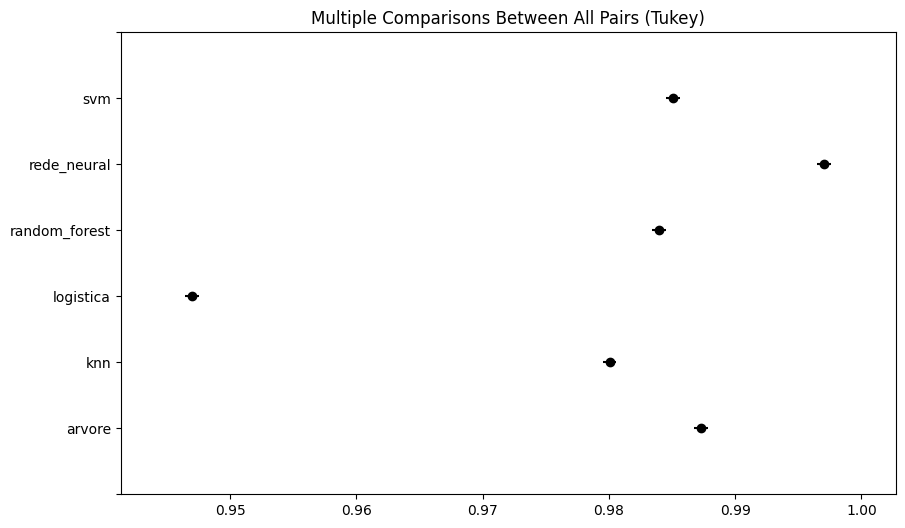

In [ ]:
teste_estatistico.plot_simultaneous();
# Nesse caso a 'rede_neural' é superior